In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import se\\aborn as sns
DATA_PATH = '/kaggle/input/playground-series-s3e20'
# Load files
train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
samplesubmission = pd.read_csv(os.path.join(DATA_PATH, 'sample_submission.csv'))

train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


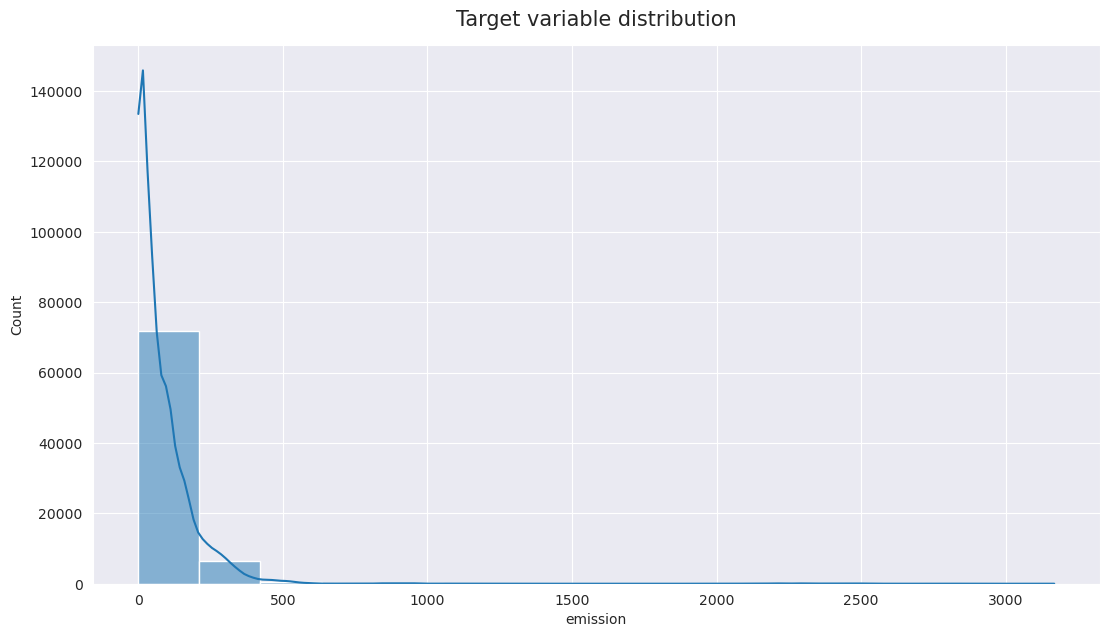

None

10.039210701855582

In [86]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())
# L'indice di asimmetria positivo suggerisce che la distribuzione è fortemente asimmetrica verso destra.

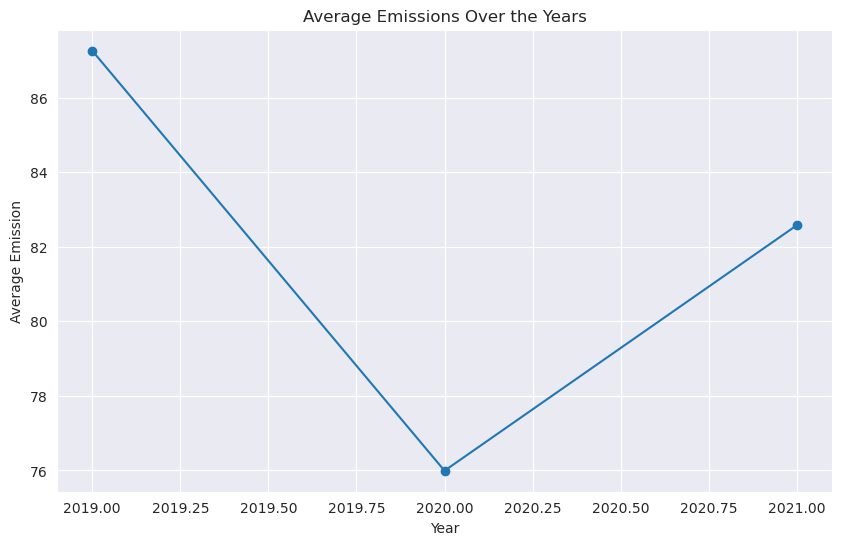

In [89]:
# Group data by year and visualize trends
yearly_emissions = train.groupby('year')['emission'].mean()

plt.figure(figsize=(10, 6))
yearly_emissions.plot(marker='o')
plt.title('Average Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Emission')
plt.grid(True)
plt.show()

#il covid ha avuto un forte impatto sulle emissioni, bisogna tenerlo in considerazione

In [5]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
# Calcolo dei valori limite superiori e inferiori per definire gli outlier estremi
upper_limit = Q3 + 3 * IQR
lower_limit = Q1 - 3 * IQR

# Filtraggio del dataframe per le righe con valori al di fuori dei limiti
outliers_index = ((train < lower_limit) | (train > upper_limit)).any(axis=1)

train_cleaned = train[~outliers_index]

num_outliers_removed = sum(outliers_index)
print("Numero di outlier estremi rimossi:", num_outliers_removed)

# Ora train_cleaned contiene il dataframe senza gli outlier estremi

/tmp/ipykernel_32/1716878452.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = train.quantile(0.25)
/tmp/ipykernel_32/1716878452.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = train.quantile(0.75)
/tmp/ipykernel_32/1716878452.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_index = ((train < lower_limit) | (train > upper_limit)).any(axis=1)


Numero di outlier estremi rimossi: 4882


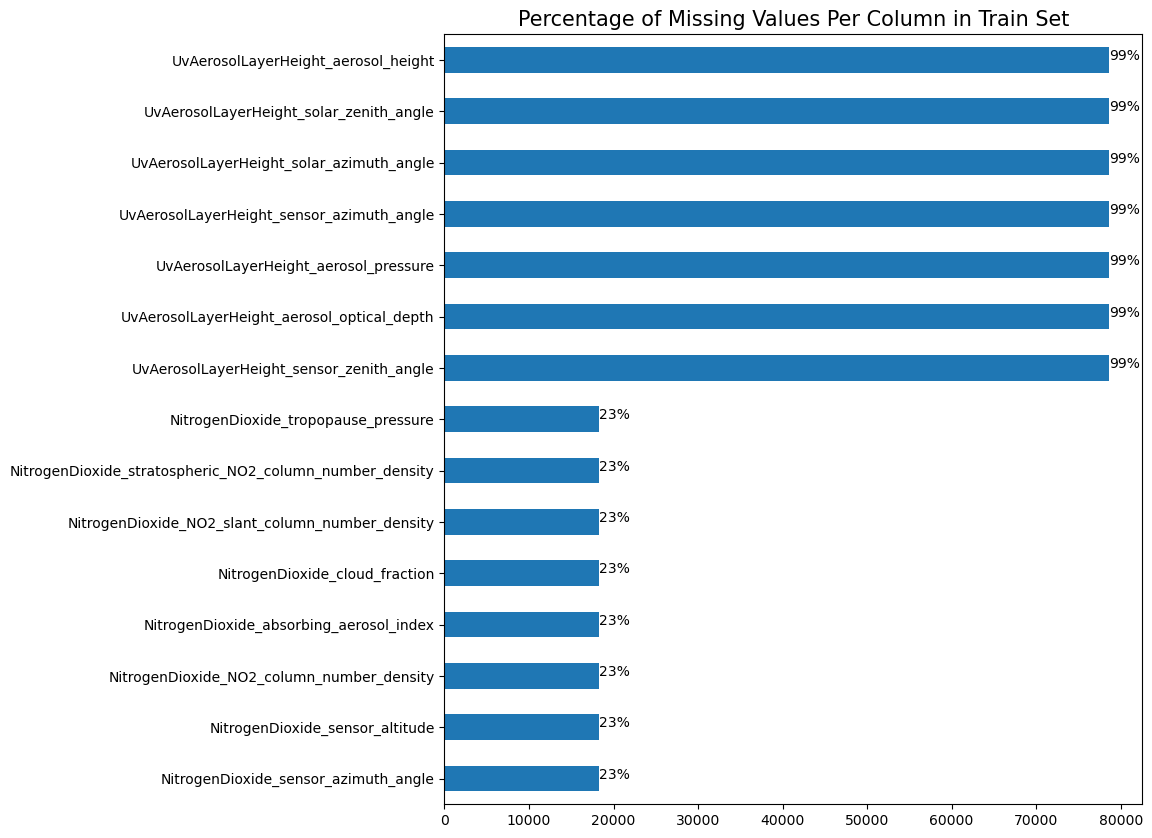

In [56]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

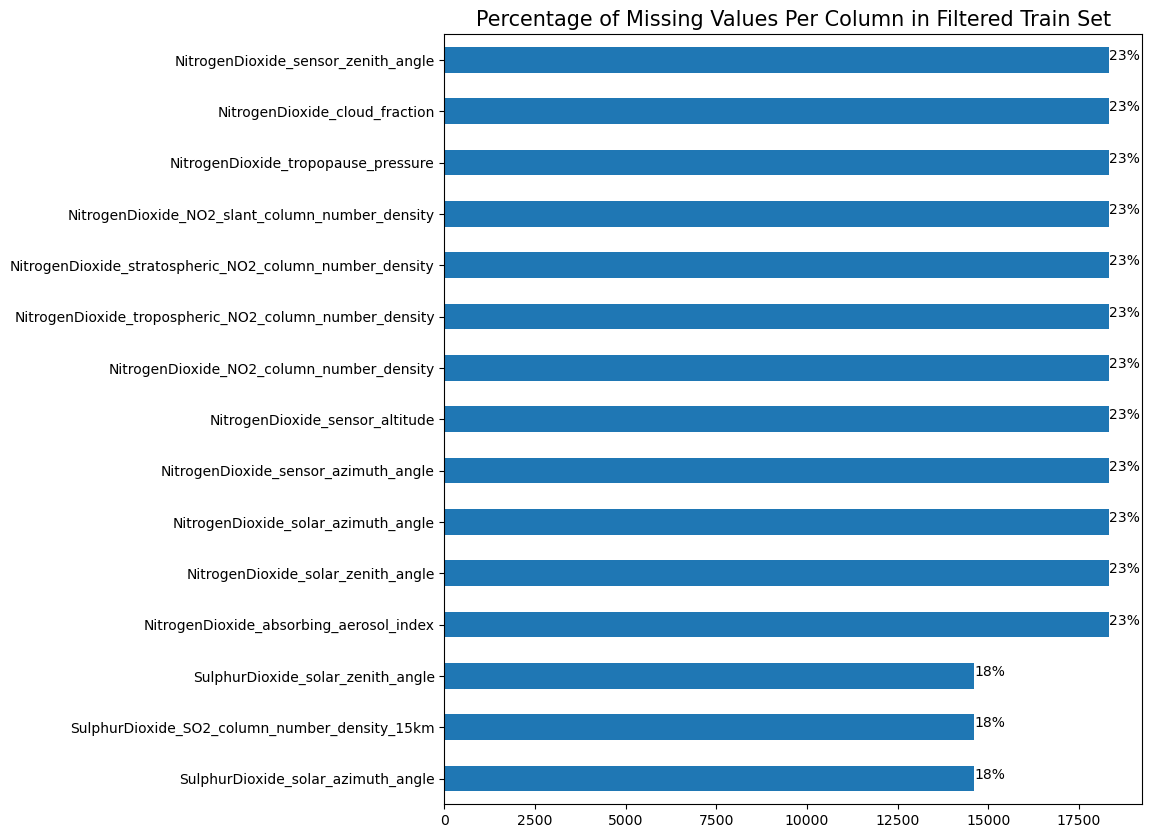

In [6]:
missing_percentage = (train.isna().sum() / train.shape[0]) * 100

columns_to_drop = missing_percentage[missing_percentage > 50].index

train_filtered = train.drop(columns=columns_to_drop)

# Plot missing values after remotion
ax = train_filtered.isna().sum().sort_values(ascending=False)[:15][::-1].plot(kind='barh', figsize=(9, 10))
plt.title('Percentage of Missing Values Per Column in Filtered Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width() / train_filtered.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax.annotate(percentage, (x, y))

plt.show()


thanks to https://www.kaggle.com/code/inversion/getting-started-eda/notebook#6.-Missing-values-and-duplicates for the useful plot

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

# Separate features and target variable
X_train = train.drop(['emission', 'ID_LAT_LON_YEAR_WEEK'], axis=1)
y_train = train['emission']

# Create a mask for missing values
missing_mask = X_train.isnull()

# Impute missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
X_train_imputed_knn = knn_imputer.fit_transform(X_train)

In [14]:
from sklearn.impute import KNNImputer, IterativeImputer

# Impute missing values using IterativeImputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
X_train_imputed_iterative = iterative_imputer.fit_transform(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
for col in X_train_imputed.columns:
    X_train_imputed[col] = pd.to_numeric(X_train_imputed[col], errors='coerce')

In [45]:
total_missing = X_train_imputed.isna().sum().sum()
print("Numero totale di valori mancanti:", total_missing)

missing_per_column = X_train_imputed.isna().sum()
columns_with_missing = missing_per_column[missing_per_column > 0]
print("Colonne con valori mancanti:")
print(columns_with_missing)
#there are still some missing data, interpolation have problems, probably some missing data in a row

Numero totale di valori mancanti: 0
Colonne con valori mancanti:
Series([], dtype: int64)


In [46]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Trova le colonne con almeno un dato mancante
columns_with_missing_values = X_train_imputed.columns[X_train_imputed.isnull().any()]

# Creazione del modello di regressione HistGradientBoosting
model = HistGradientBoostingRegressor()

# Itera attraverso le colonne con valori mancanti
for col in columns_with_missing_values:
    # Creazione del dataset di addestramento (senza righe con valori mancanti)
    X_train_rf = X_train_imputed.dropna(subset=[col])
    y_train_rf = X_train_rf[col]
    X_train_rf = X_train_rf.drop(columns=[col])
    
    # Addestramento del modello
    model.fit(X_train_rf, y_train_rf)
    
    # Previsione dei valori mancanti
    missing_indices = X_train_imputed[X_train_imputed[col].isnull()].index
    missing_predictions = model.predict(X_train_imputed.loc[missing_indices, :].drop(columns=[col]))
    
    # Aggiornamento dei valori mancanti nel DataFrame originale
    X_train_imputed.loc[missing_indices, col] = missing_predictions

# Verifica se ci sono ancora valori mancanti dopo la stima con HistGradientBoosting
remaining_missing_values = X_train_imputed.isnull().sum().sum()
print("Numero totale di valori mancanti rimanenti:", remaining_missing_values)
#we use HistGradientBoosting to estimate the remaining data

Numero totale di valori mancanti rimanenti: 0


/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [48]:
precovid = train[['emission', 'ID_LAT_LON_YEAR_WEEK']]



In [49]:
# Estrai le informazioni da 'ID_LAT_LON_YEAR_WEEK'
precovid['LAT'] = precovid['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: float(x.split('_')[1]))
precovid['LON'] = precovid['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: float(x.split('_')[2]))
precovid['YEAR'] = precovid['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: int(x.split('_')[3]))
precovid['WEEK'] = precovid['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: int(x.split('_')[4]))

/tmp/ipykernel_32/1106966848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid['LAT'] = precovid['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: float(x.split('_')[1]))
/tmp/ipykernel_32/1106966848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid['LON'] = precovid['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: float(x.split('_')[2]))
/tmp/ipykernel_32/1106966848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

<Axes: xlabel='YEAR,WEEK'>

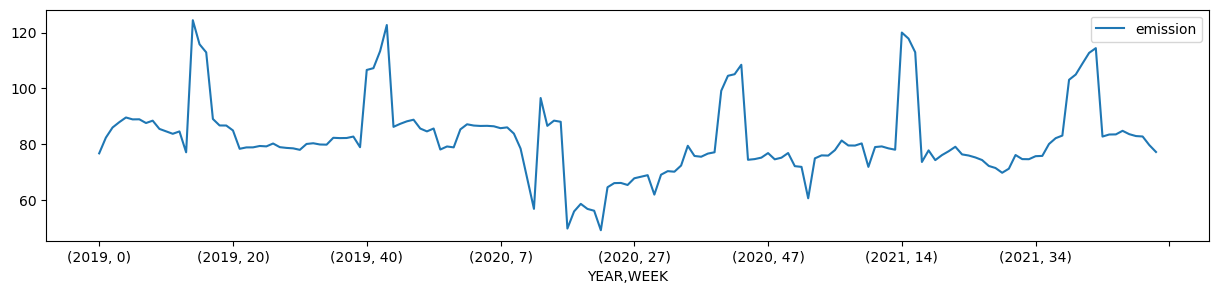

In [24]:
precovid.pivot_table(index=['YEAR','WEEK'],values=['emission']).plot(figsize=(15,3))
#plotting our y in a historical series

In [50]:
postcovid=precovid
# Calculate the average weekly emissions for non-virus years (2019 and 2021)
avg_emission_non_virus = postcovid[postcovid['YEAR'].isin((2019,2021))].groupby('WEEK')['emission'].mean()

# Calculate the average weekly emissions for virus year (2020)
avg_emission_virus = postcovid[postcovid['YEAR'] == 2020].groupby('WEEK')['emission'].mean()

# Calculate the ratios for each week
ratios_for_weeks = avg_emission_non_virus/avg_emission_virus

# Multiply the emission column for each row in 2020 by the corresponding ratio for the week of that row
postcovid.loc[postcovid['YEAR'] == 2020, 'emission'] *= postcovid['WEEK'].map(ratios_for_weeks)


In [26]:
postcovid

,emission,ID_LAT_LON_YEAR_WEEK,LAT,LON,YEAR,WEEK
0,3.750994,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0
159,3.857115,ID_-0.528_29.472_2019_00,-0.528,29.472,2019,0
318,0.500023,ID_-0.547_29.653_2019_00,-0.547,29.653,2019,0
477,100.382980,ID_-0.569_30.031_2019_00,-0.569,30.031,2019,0
636,0.076542,ID_-0.598_29.102_2019_00,-0.598,29.102,2019,0
...,...,...,...,...,...,...
78386,15.040095,ID_-3.153_30.347_2021_52,-3.153,30.347,2021,52
78545,0.122683,ID_-3.161_28.839_2021_52,-3.161,28.839,2021,52
78704,42.904007,ID_-3.174_29.926_2021_52,-3.174,29.926,2021,52
78863,43.260082,ID_-3.287_29.713_2021_52,-3.287,29.713,2021,52


idea come from https://www.kaggle.com/competitions/playground-series-s3e20/discussion/429622 to make the model more robust
We took out the covid effect

<Axes: xlabel='YEAR,WEEK'>

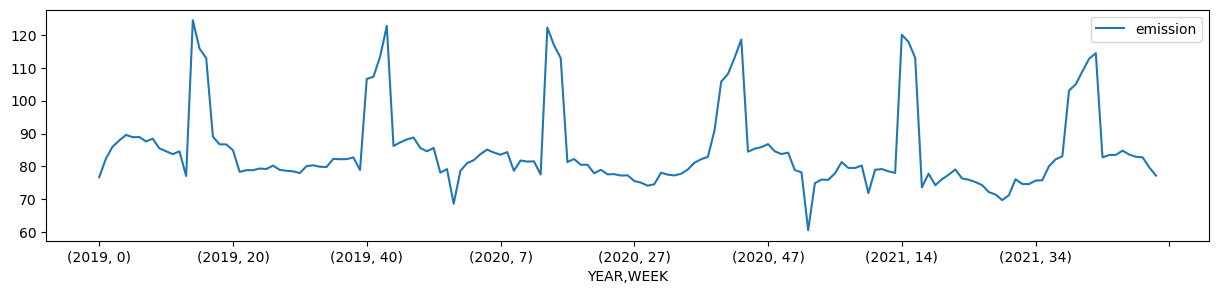

In [51]:
postcovid.pivot_table(index=['YEAR','WEEK'],values=['emission']).plot(figsize=(15,3))

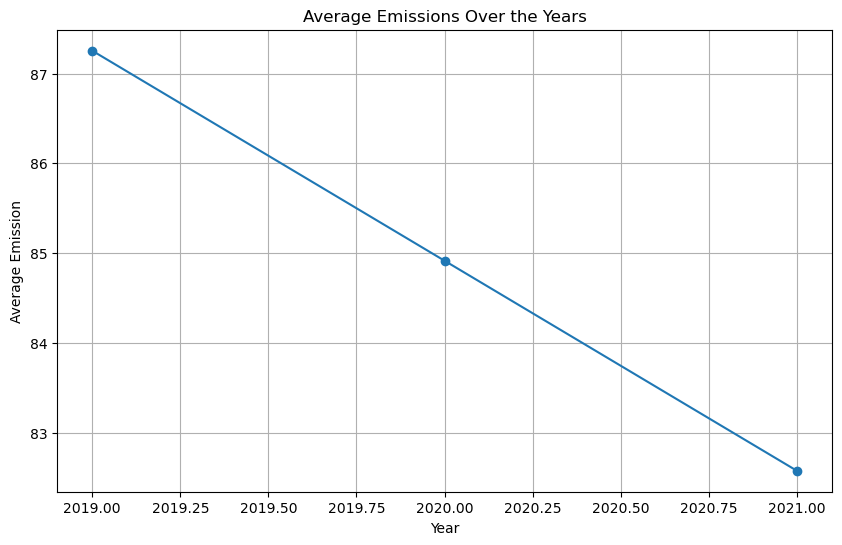

In [28]:
# Group data by year and visualize trends
yearly_emissions = postcovid.groupby('YEAR')['emission'].mean()

plt.figure(figsize=(10, 6))
yearly_emissions.plot(marker='o')
plt.title('Average Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Emission')
plt.grid(True)
plt.show()
#same plot we used before, correcting the covid 19 period

In [29]:
# Top 20 correlated features to the target
top20_corrs = abs(train.corr()['emission']).sort_values(ascending = False).head(20)
top20_corrs

/tmp/ipykernel_32/1382068487.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top20_corrs = abs(train.corr()['emission']).sort_values(ascending = False).head(20)


emission                                                    1.000000
longitude                                                   0.102746
UvAerosolLayerHeight_aerosol_height                         0.069008
UvAerosolLayerHeight_aerosol_pressure                       0.068138
Cloud_surface_albedo                                        0.046587
CarbonMonoxide_H2O_column_number_density                    0.043217
CarbonMonoxide_CO_column_number_density                     0.041328
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.040263
UvAerosolLayerHeight_aerosol_optical_depth                  0.040156
UvAerosolLayerHeight_sensor_azimuth_angle                   0.035142
NitrogenDioxide_solar_azimuth_angle                         0.033417
Formaldehyde_tropospheric_HCHO_column_number_density        0.033333
SulphurDioxide_solar_azimuth_angle                          0.032338
Formaldehyde_solar_azimuth_angle                            0.030815
NitrogenDioxide_sensor_altitude   

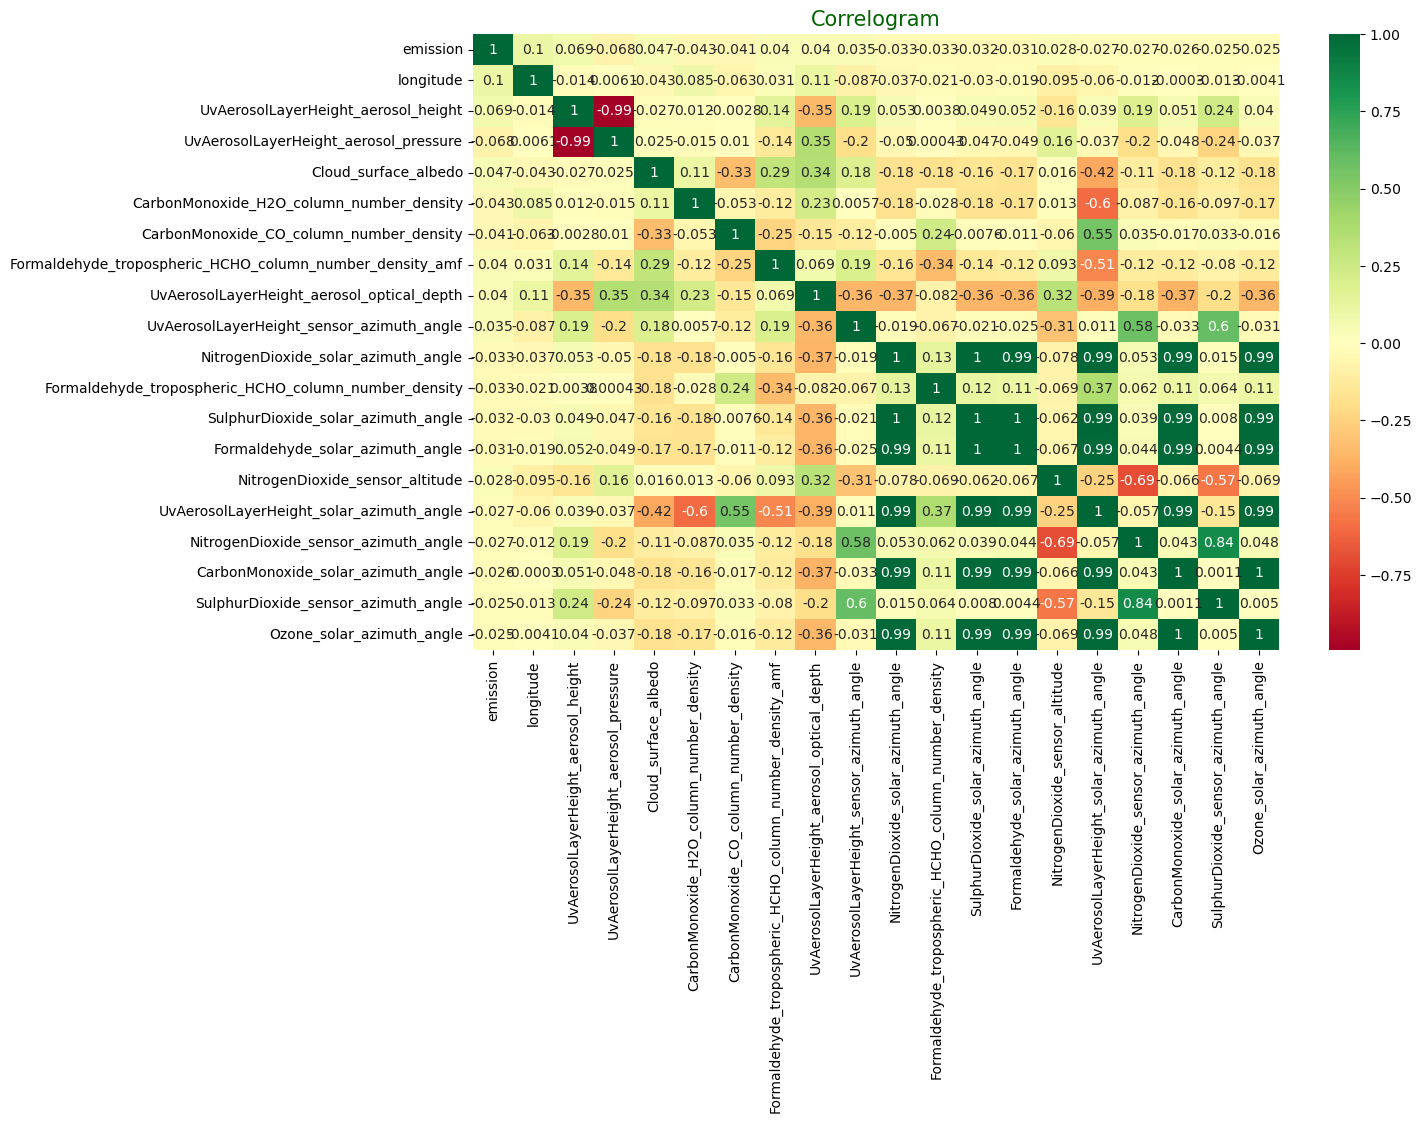

In [30]:
# Quantify correlations between features
corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()
#remove highly correlated variables
highly_correlated_indices = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:  
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            highly_correlated_indices.add(colname_i)
            highly_correlated_indices.add(colname_j)

train_filtered = train.drop(columns=highly_correlated_indices)

In [160]:
import geopandas as gpd
from shapely.geometry import Point
import folium
# Combine train and test for easy visualisation
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(
    all_data[["latitude", "longitude", "set_type"]], geometry=geometry
)

# Preview the geopandas df
geo_df.head()

/tmp/ipykernel_32/1452909849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'
/tmp/ipykernel_32/1452909849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'


,latitude,longitude,set_type,geometry
0,-0.510,29.290,train,POINT (29.29000 -0.51000)
1,-0.528,29.472,train,POINT (29.47200 -0.52800)
2,-0.547,29.653,train,POINT (29.65300 -0.54700)
3,-0.569,30.031,train,POINT (30.03100 -0.56900)
4,-0.598,29.102,train,POINT (29.10200 -0.59800)


In [161]:
# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type set
    if geo_df.set_type[i] == "train":
        type_color = "green"
    elif geo_df.set_type[i] == "test":
        type_color = "orange"

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            popup= 
            "Set: " + str(geo_df.set_type[i]) + "<br>"
            "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]]),
            color =  type_color),
        )
    i = i + 1
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

source: https://www.kaggle.com/code/inversion/getting-started-eda/notebook#5.-Geo-Visualisation---EDA

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_imputed, postcovid["emission"], test_size=0.2, random_state=42)

# Initialize a Random Forest regressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3155.5561158225732


In [32]:
# Analyse predictions
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = predictions
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

,latitude,longitude,year,week_no,emission,prediction,error
56816,-2.378,29.222,2020,0,1663.116116,2112.186250,449.070133
55558,-2.335,29.665,2020,14,489.138215,163.137659,326.000556
27099,-1.514,29.686,2020,16,578.400154,293.252993,285.147161
56869,-2.378,29.222,2021,0,1821.720500,2091.522109,269.801609
56855,-2.378,29.222,2020,39,2734.958373,2465.338452,269.619921


In [33]:
# Make prediction on the test set
test_df = postcovid.drop(['ID_LAT_LON_YEAR_WEEK'],axis=1).fillna(0)
predictions = model.predict(test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': postcovid.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()

,emission,ID_LAT_LON_YEAR_WEEK,LAT,LON,YEAR,WEEK
0,3.750994,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0
159,3.857115,ID_-0.528_29.472_2019_00,-0.528,29.472,2019,0
318,0.500023,ID_-0.547_29.653_2019_00,-0.547,29.653,2019,0
477,100.382980,ID_-0.569_30.031_2019_00,-0.569,30.031,2019,0
636,0.076542,ID_-0.598_29.102_2019_00,-0.598,29.102,2019,0
...,...,...,...,...,...,...
78386,15.040095,ID_-3.153_30.347_2021_52,-3.153,30.347,2021,52
78545,0.122683,ID_-3.161_28.839_2021_52,-3.161,28.839,2021,52
78704,42.904007,ID_-3.174_29.926_2021_52,-3.174,29.926,2021,52
78863,43.260082,ID_-3.287_29.713_2021_52,-3.287,29.713,2021,52


In [34]:
# Make prediction on the test set
test_df = test.drop(['ID_LAT_LON_YEAR_WEEK'], axis = 1).fillna(0)
predictions = model.predict(test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()


,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.819314
1,ID_-0.510_29.290_2022_01,4.033698
2,ID_-0.510_29.290_2022_02,4.156636
3,ID_-0.510_29.290_2022_03,4.248822
4,ID_-0.510_29.290_2022_04,4.349736


In [37]:
# Create file
sub_file.to_csv('BaselineSubmission2.csv', index = False) # Download and submit, or submit via Notebook output

       latitude  longitude  year  week_no  \
0        -0.510     29.290  2019        0   
159      -0.528     29.472  2019        0   
318      -0.547     29.653  2019        0   
477      -0.569     30.031  2019        0   
636      -0.598     29.102  2019        0   
...         ...        ...   ...      ...   
78386    -3.153     30.347  2021       52   
78545    -3.161     28.839  2021       52   
78704    -3.174     29.926  2021       52   
78863    -3.287     29.713  2021       52   
79022    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
159                                    0.000019   
318                                   -0.000003   
477                                   -0.000084   
636                                   -0.000019   
...                                         ...   
78386                                  0.000003   
78545                                  0.000325   
